In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
from sklearn.datasets import fetch_california_housing

In [25]:
df=fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [26]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [27]:
dataset.columns=df.feature_names

In [28]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
# Independent and dependent features
X=dataset
y=df.target

In [30]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)#30% data -> testing 70% data->training


In [31]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [32]:
X_train=scaler.fit_transform(X_train)#learn+apply
X_train
""" when we use fit f
it() learns statistics from data:
mean
standard deviation

For StandardScaler:
z = (x - mean) / std"""


' when we use fit f\nit() learns statistics from data:\nmean\nstandard deviation\n\nFor StandardScaler:\nz = (x - mean) / std'

In [33]:
X_test=scaler.transform(X_test)#only apply

In [34]:
from sklearn.linear_model import Ridge

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
ridge_regressor= Ridge()
ridge_regressor

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [37]:
parameters={'alpha':[1,2,3,5,10,20,30,40,50,60,70]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5


In [38]:
print(ridgecv.best_params_)

{'alpha': 5}


In [39]:
print(ridgecv.best_score_)

-0.5268179966861513


In [40]:
ridge_pred=ridgecv.predict(X_test)


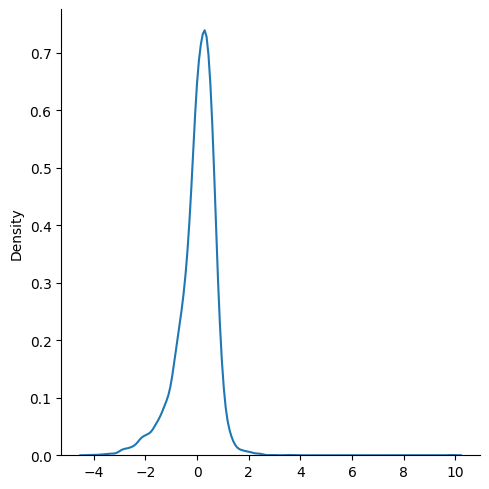

In [41]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [43]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,y_test)
score

0.34383945441404373

In [44]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [45]:
lasso=Lasso()

In [46]:
parameters={'alpha':[1,2,3,5,10,20,30,40,50,60,70]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [47]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [48]:
lasso_pred= lassocv.predict(X_test)

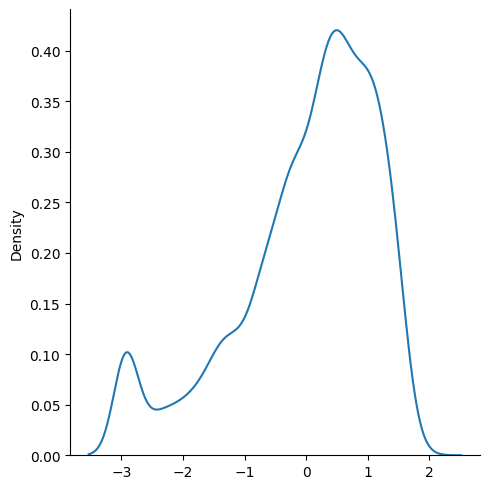

In [49]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')